### Unsupervised Learning

Unsupervised Learning addresses a different sort of problem. Here the data has no labels, and we are interested in finding similarities between the objects in question. In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself. Unsupervised learning comprises tasks such as dimensionality reduction, clustering, and density estimation.

### Dimensionality Reduction

**Principle Component Analysis (PCA)** is a dimension reduction technique that can find the combinations of variables that explain the most variance. Here we'll show an example of using PCA for visualization.
Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

Reduced dataset shape: (150, 2)


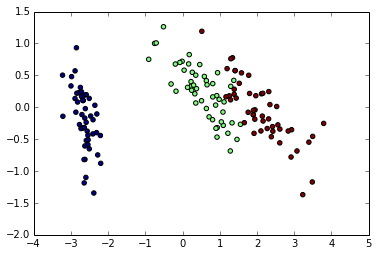

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets


%matplotlib inline

iris = datasets.load_iris()
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y);


### Clustering

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.
Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.


### K Means

K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels). K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple iris data: 

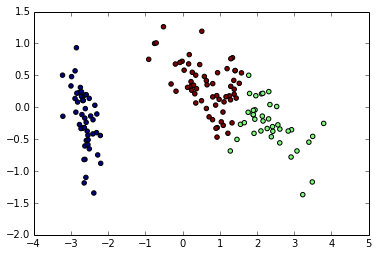

In [3]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

### KMeans for Color Compression

One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.
Scikit-learn has a number of images that you can play with, accessed through the datasets module. 


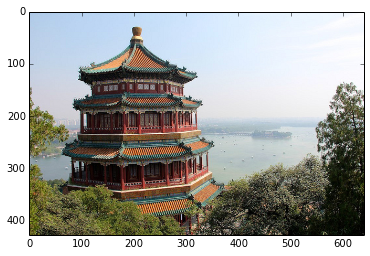

In [4]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
%matplotlib inline

china = load_sample_image("china.jpg")
plt.imshow(china);

In [5]:
#The image itself is stored in a 3-dimensional array, of size ``(height, width, RGB)``:
china.shape

#We can envision this image as a cloud of points in a 3-dimensional color space.
#We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical scikit-learn input:

X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


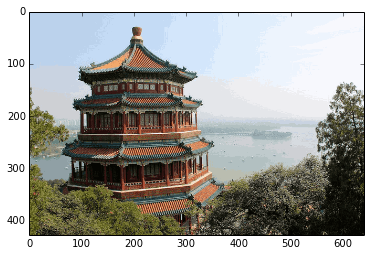

In [7]:
#We now have 273,280 points in 3 dimensions. 
#Our task is to use KMeans to compress the 2563 colors into a smaller number (say, 64 colors). 
#Basically, you want to find Ncolor clusters in the data..
#And create a new image where the true input color is replaced by the color of the closest cluster.

from sklearn.cluster import KMeans
import numpy as np

def compress_image(image, n_colors=64):
   
    X = image.reshape(-1, 3) / 255.
    model = KMeans(n_colors)
    labels = model.fit_predict(X)
    colors = model.cluster_centers_
    new_image = colors[labels].reshape(image.shape)
    return (255 * new_image).astype(np.uint8)


new_image = compress_image(china, 64)
plt.imshow(new_image);

